In [1]:
import csv
from eisy.simulation import data_simulation
import numpy as np
import pandas as pd
import time
from eisy.simulation import plotting
from eisy.simulation import circuits
import matplotlib.pyplot as plt

Define the frequency range you want to investigate:

In [2]:
# Define the initial and final frequency values
f_start = 10**8
f_stop = 0.01
decades = 7

f_range= circuits.freq_gen(f_start, f_stop, decades)

Define the circuit you want to simulate. In this case we are goign to use a simple RC circuit. 

<img src='https://raw.githubusercontent.com/kbknudsen/PyEIS/master/pyEIS_images/RC_circuit.png' width="300" />

In [37]:
R = 100 # ohm
C= 10E-6 #F

circuit = circuits.cir_RC_parallel(f_range[1], 100, 10E-6)
#Print the first 15 elements of the 'circuit'array.
print('Complex Impedance Response :\n {}'.format(circuit[0:15]))

Complex Impedance Response :
 [2.53302959e-10-0.00015915j 4.93736616e-10-0.0002222j
 9.62388463e-10-0.00031022j 1.87588185e-09-0.00043311j
 3.65645770e-09-0.00060469j 7.12714551e-09-0.00084422j
 1.38921895e-08-0.00117865j 2.70785728e-08-0.00164556j
 5.27813924e-08-0.00229742j 1.02881175e-07-0.00320751j
 2.00535372e-07-0.00447812j 3.90882348e-07-0.00625206j
 7.61905537e-07-0.00872872j 1.48510171e-06-0.01218647j
 2.89475135e-06-0.01701397j]


Next simulate the impedance data for the above circuit and print few lines of the dataframe. 

In [38]:
rc_response = data_simulation.RC_simulation(f_start, f_stop, decades, R, C,'parallel') 


The next line performs the simulation and saves the data, as well as the resulting plot on separate files in a folder called _*simuation_data*_ created in the dicretory containng this jupyter notebook

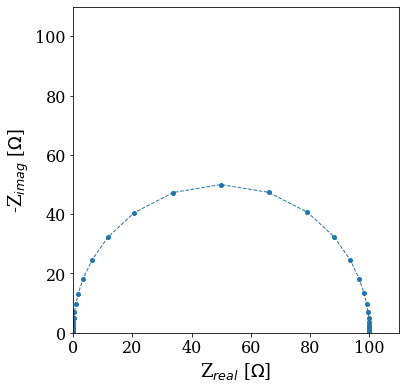

In [5]:
file= data_simulation.RC_file_writer(f_start, f_stop, decades, R, C,'parallel', save_image=True)

### 1-semicircle

In [6]:
f_start = 10**8
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 100 # ohm
C= 2*10E-6 #F


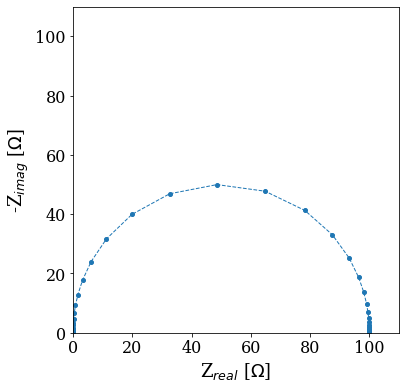

In [7]:
circuit = circuits.cir_RC_parallel(f_range[1], Rs,C)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'one_semicircle',save_location='simulation_data/', save_image=False)

### 1-semicircle Shifted

In [16]:
f_start = 10**8
f_stop = 0.01
decades = 3
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R1= 50   # ohm

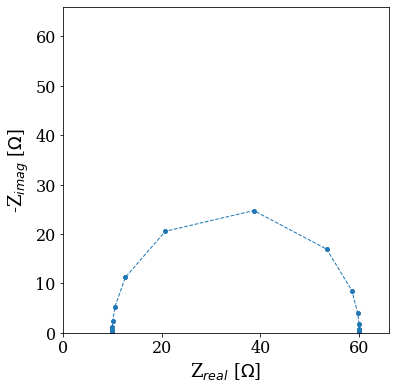

In [18]:
circuit = circuits.cir_RsRC(f_range[1], Rs, R1,C)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'shifted_semicircle', save_location='simulation_data/', save_image=False)

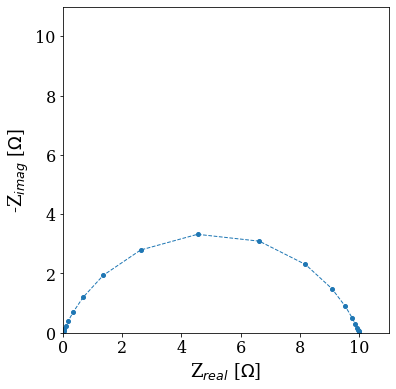

In [9]:
circuit = circuits.cir_RQ_parallel(f_range[1], Rs,C,0.75)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'blob_single_semicircle_2',save_location='simulation_data/', save_image=False )

#### 2- semicircles

In [ ]:
f_start = 10**8
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R1= 50   # ohm

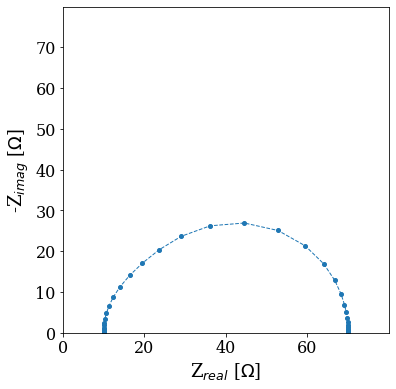

In [17]:
circuit = circuits.cir_RsRCRC(f_range[1], Rs, R1,C, Rs,C)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'shifted_double_semicircle_1',save_location='simulation_data/', save_image=False )

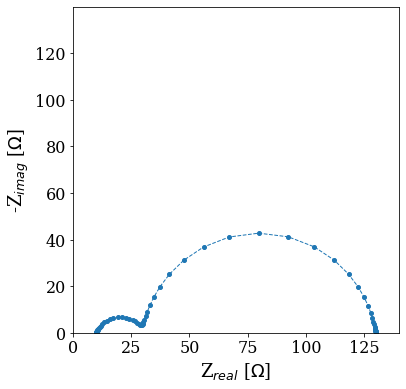

In [22]:
circuit = circuits.cir_RsRQRQ(f_range[1], Rs, 20,10**(-6),0.75, 100,C,0.9)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'shifted_double_semicircle_2',save_location='simulation_data/', save_image=False )

### Randles

In [23]:
f_start = 10**8
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R1= 50   # ohm

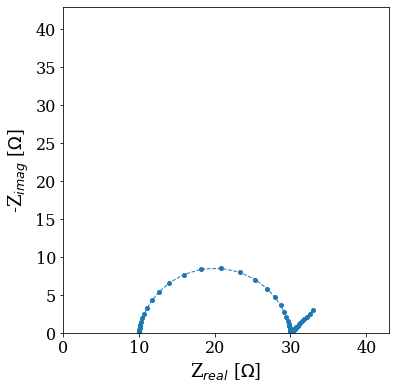

In [30]:
circuit = circuits.cir_Randles_simplified(f_range[1], Rs, 20,0.9,0.75,10**(-6))
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'tail',save_location='simulation_data/', save_image=False)